#**YOLOv2**
* DaNang,22/06/2022 1:32 AM
* By LeoGino
* Contact: leo18gino@gmail.com
* Papers: https://pjreddie.com/darknet/yolov2/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Step 1:** Create Darknet

In [ ]:
!rm -rf darknet
%cd /content/drive/MyDrive/YOLOv2
!git clone https://github.com/AlexeyAB/darknet
%cd /content/drive/MyDrive/YOLOv2/darknet
!rm -rf data

/content/drive/MyDrive/YOLOv2
Cloning into 'darknet'...
remote: Enumerating objects: 15424, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 15424 (delta 0), reused 1 (delta 0), pack-reused 15423
Receiving objects: 100% (15424/15424), 14.05 MiB | 5.08 MiB/s, done.
Resolving deltas: 100% (10364/10364), done.
Checking out files: 100% (2050/2050), done.
/content/drive/MyDrive/YOLOv2/darknet


In [ ]:
!ls

3rdparty		darknet_images.py      LICENSE	      src
build			darknet.py	       Makefile       vcpkg.json
build.ps1		darknet_video.py       net_cam_v3.sh  video_yolov3.sh
cfg			image_yolov3.sh        net_cam_v4.sh  video_yolov4.sh
cmake			image_yolov4.sh        README.md
CMakeLists.txt		include		       results
DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts


**Step 2:** Setup GPU

In [ ]:
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1150:10: note: ...thi

**Step 3:** Download weight

In [ ]:
!wget https://pjreddie.com/media/files/yolov2.weights

--2022-06-21 16:43:33--  https://pjreddie.com/media/files/yolov2.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘yolov2.weights’

yolov2.weights      100%[===================>] 194.49M  22.0MB/s    in 10s     

2022-06-21 16:43:44 (19.2 MB/s) - ‘yolov2.weights’ saved [203934260/203934260]



In [ ]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

--2022-06-21 17:44:15--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco.names          100%[===================>]     625  --.-KB/s    in 0s      

2022-06-21 17:44:15 (17.3 MB/s) - ‘coco.names’ saved [625/625]



**Step 4:** Test

In [ ]:
!pwd
%cd /content/drive/MyDrive/YOLOv2/darknet/
!chmod +x ./darknet
!./darknet detect /content/drive/MyDrive/YOLOv2/darknet/cfg/yolov2.cfg /content/drive/MyDrive/YOLOv2/darknet/yolov2.weights /content/drive/MyDrive/YOLOv2/darknet/data/traffic.jpg

/content/drive/MyDrive/YOLOv2/darknet
/content/drive/MyDrive/YOLOv2/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                

**Step 5:** Show result of YOLOv2

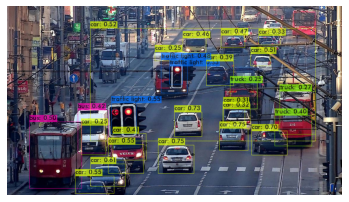

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os.path
fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([])
ax.axis('off')
file = '/content/drive/MyDrive/YOLOv2/darknet/predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(show_img)

With YOLOv1 

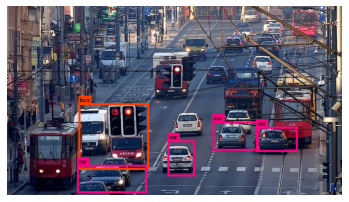

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os.path
fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([])
ax.axis('off')
file = '/content/drive/MyDrive/YOLOv1/darknet/predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(show_img)